In [29]:
%matplotlib inline

In [70]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import cm
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode, plot
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))



april-mig-data



In [124]:
data = pd.read_excel('/kaggle/input/april-mig-data/april-2018-itm-tables-2.xlsx', 'Table 1', header=None)


*  Overseas residents arriving in New Zealand for a stay of less than 12 months.
*   New Zealand residents arriving in New Zealand after an absence of less than 12 months.
*   Overseas migrants who arrive in New Zealand intending to stay for a period of 12 months or more (or permanently), plus New Zealand residents 
*   Overseas residents departing New Zealand after a stay of less than 12 months.
*   New Zealand residents departing New Zealand for an absence of less than 12 months.
*   New Zealand residents departing for an intended period of 12 months or more (or permanently), plus overseas visitors departing New Zealand
* Permanent and long-term arrivals minus permanent and long-term departures.







In [127]:
year_beging_apr = data.loc[10:22]
year_beging_apr.drop([10, 22], inplace=True);

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [128]:
year_beging_apr.drop(0, axis=1, inplace = True)

,0,1,2,3,4,5,6,7,8,9,10
11,NaN,2008,179388,132865,5859,318112,221359,164309,7127,392795,-1268
12,NaN,2009,195883,149241,5975,351099,224810,162384,5549,392743,426
13,NaN,2010,187962,157862,5259,351083,231443,162996,5852,400291,-593
14,NaN,2011,197777,157388,5700,360865,218384,182568,7339,408291,-1639
15,NaN,2012,195668,178690,5123,379481,236509,183232,7385,427126,-2262
16,NaN,2013,200583,161244,6314,368141,255399,184859,6342,446600,-28
17,NaN,2014,224194,165128,7130,396452,255892,199251,4706,459849,2424
18,NaN,2015,237966,198714,7776,444456,284485,202346,4814,491645,2962
19,NaN,2016,256685,194126,8376,459187,318687,217797,4923,541407,3453
20,NaN,2017,311866,221345,8637,541848,347567,244233,5231,597031,3406


In [12]:
year_beging_apr.drop(22)

,1,2,3,4,5,6,7,8,9,10
11,2008,179388,132865,5859,318112,221359,164309,7127,392795,-1268
12,2009,195883,149241,5975,351099,224810,162384,5549,392743,426
13,2010,187962,157862,5259,351083,231443,162996,5852,400291,-593
14,2011,197777,157388,5700,360865,218384,182568,7339,408291,-1639
15,2012,195668,178690,5123,379481,236509,183232,7385,427126,-2262
16,2013,200583,161244,6314,368141,255399,184859,6342,446600,-28
17,2014,224194,165128,7130,396452,255892,199251,4706,459849,2424
18,2015,237966,198714,7776,444456,284485,202346,4814,491645,2962
19,2016,256685,194126,8376,459187,318687,217797,4923,541407,3453
20,2017,311866,221345,8637,541848,347567,244233,5231,597031,3406


In [13]:
year_beging_apr

,1,2,3,4,5,6,7,8,9,10
11,2008,179388,132865,5859,318112,221359,164309,7127,392795,-1268
12,2009,195883,149241,5975,351099,224810,162384,5549,392743,426
13,2010,187962,157862,5259,351083,231443,162996,5852,400291,-593
14,2011,197777,157388,5700,360865,218384,182568,7339,408291,-1639
15,2012,195668,178690,5123,379481,236509,183232,7385,427126,-2262
16,2013,200583,161244,6314,368141,255399,184859,6342,446600,-28
17,2014,224194,165128,7130,396452,255892,199251,4706,459849,2424
18,2015,237966,198714,7776,444456,284485,202346,4814,491645,2962
19,2016,256685,194126,8376,459187,318687,217797,4923,541407,3453
20,2017,311866,221345,8637,541848,347567,244233,5231,597031,3406


In [14]:
year_beging_apr.columns = ['Year', 'Arrivals Overseas visitors', 'Arrivals NZ-resident travellers', 
        'Permanent & long-term migrants','Total', 'Departures Overseas visitors', 'Departures NZ-resident travellers', 
        'Departures Permanent & long-term migrants','Total', 'Net permanent & long-term migration']

In [15]:
year_beging_apr

,Year,Arrivals Overseas visitors,Arrivals NZ-resident travellers,Permanent & long-term migrants,Total,Departures Overseas visitors,Departures NZ-resident travellers,Departures Permanent & long-term migrants,Total,Net permanent & long-term migration
11,2008,179388,132865,5859,318112,221359,164309,7127,392795,-1268
12,2009,195883,149241,5975,351099,224810,162384,5549,392743,426
13,2010,187962,157862,5259,351083,231443,162996,5852,400291,-593
14,2011,197777,157388,5700,360865,218384,182568,7339,408291,-1639
15,2012,195668,178690,5123,379481,236509,183232,7385,427126,-2262
16,2013,200583,161244,6314,368141,255399,184859,6342,446600,-28
17,2014,224194,165128,7130,396452,255892,199251,4706,459849,2424
18,2015,237966,198714,7776,444456,284485,202346,4814,491645,2962
19,2016,256685,194126,8376,459187,318687,217797,4923,541407,3453
20,2017,311866,221345,8637,541848,347567,244233,5231,597031,3406


Let's look at the year beging from 2008 to 2018 overal stats

In [16]:
year_beging_apr.describe().T


,count,unique,top,freq
Year,11,11,2015,1
Arrivals Overseas visitors,11,11,237966,1
Arrivals NZ-resident travellers,11,11,194126,1
Permanent & long-term migrants,11,11,8637,1
Total,11,11,541848,1
Departures Overseas visitors,11,11,221359,1
Departures NZ-resident travellers,11,11,184859,1
Departures Permanent & long-term migrants,11,11,5231,1
Total,11,11,541407,1
Net permanent & long-term migration,11,11,-2262,1


In [26]:
list_tab10, list_Paired = [],[]
tab10_255 = cm.tab10(list(range(10)),bytes=255)
Paired_255 = cm.Paired(list(range(10)),bytes=255)

for i in range(10):
    list_tab10.append('rgba({},{},{},1)'.format(tab10_255[i,0],tab10_255[i,1],tab10_255[i,2]))
    list_Paired.append('rgba({},{},{},1)'.format(Paired_255[i,0],Paired_255[i,1],Paired_255[i,2]))

In [30]:
trace_arr = go.Scatter(x=year_beging_apr['Year'], 
                       y=year_beging_apr['Arrivals NZ-resident travellers'], name = 'Arrivals')
trace_dep = go.Scatter(x=year_beging_apr['Year'], y=year_beging_apr['Departures NZ-resident travellers'], name = 'Departures')
# trace_net = go.Scatter(x=year_beging_apr['Year beginning April'], y=year_beging_apr['Net permanent & long-term migration'], name = 'Net')
layout = dict(title = 'Arrivals and Deparatures of NZ-residents Beginning of the Year(April)',
              xaxis = dict(title = 'Year', dtick=1, tickangle=-60),
              yaxis = dict(title = 'Passengers'))

# put everything in a dict...
fig = dict(data=[trace_arr, trace_dep], layout=layout)
# ... and plot it
iplot(fig)

In [31]:
trace_arr = go.Scatter(x=year_beging_apr['Year'], 
                       y=year_beging_apr['Arrivals Overseas visitors'], name = 'Arrivals')
trace_dep = go.Scatter(x=year_beging_apr['Year'], y=year_beging_apr['Departures Overseas visitors'], name = 'Departures')
# trace_net = go.Scatter(x=year_beging_apr['Year beginning April'], y=year_beging_apr['Net permanent & long-term migration'], name = 'Net')
layout = dict(title = 'Arrivals and Deparatures of Overseas visitors Beginning of the Year(April)',
              xaxis = dict(title = 'Year', dtick=1, tickangle=-60),
              yaxis = dict(title = 'Passengers'))

# put everything in a dict...
fig = dict(data=[trace_arr, trace_dep], layout=layout)
# ... and plot it
iplot(fig)

In [32]:
trace_arr = go.Scatter(x=year_beging_apr['Year'], 
                       y=year_beging_apr['Permanent & long-term migrants'], name = 'Arrivals')
trace_dep = go.Scatter(x=year_beging_apr['Year'], y=year_beging_apr['Departures Permanent & long-term migrants'], name = 'Departures')
trace_net = go.Scatter(x=year_beging_apr['Year'], y=year_beging_apr['Net permanent & long-term migration'], name = 'Net')
layout = dict(title = 'Arrivals and Deparatures of Permanent & long-term migrants Beginning of the Year(April)',
              xaxis = dict(title = 'Year', dtick=1, tickangle=-60),
              yaxis = dict(title = 'Passengers'))

# put everything in a dict...
fig = dict(data=[trace_arr, trace_dep, trace_net], layout=layout)
# ... and plot it
iplot(fig)

In [59]:

# tmp_arr = year_beging_apr.sort_values(by=[('Year')], ascending=False)
trace_nz = go.Bar(x=year_beging_apr['Year'],
                  y=year_beging_apr['Arrivals NZ-resident travellers'],
                  name='New Zealand Citizens')
trace_wo = go.Bar(x=year_beging_apr['Year'],
                  y=year_beging_apr['Arrivals Overseas visitors'],
                  name='Non New Zealand Citizens')

layout = dict(title = 'Arrivals Non NZ VS NZ',
              barmode='stack',  
              xaxis = dict(title = 'Year', dtick=1, tickangle=-60),
              yaxis = dict(title = 'Passengers'), width=750,height=500,
              margin=dict(l=50,r=50,b=100,t=100,pad=4))
        

fig = dict(data=[trace_nz, trace_wo], layout=layout)
iplot(fig)

In [61]:

# tmp_arr = year_beging_apr.sort_values(by=[('Year')], ascending=False)
trace_nz = go.Bar(x=year_beging_apr['Year'],
                  y=year_beging_apr['Departures NZ-resident travellers'],
                  name='New Zealand Citizens')
trace_wo = go.Bar(x=year_beging_apr['Year'],
                  y=year_beging_apr['Departures Overseas visitors'],
                  name='Non New Zealand Citizens')

layout = dict(title = 'Departures Non NZ VS NZ',
              barmode='stack',
              xaxis = dict(title = 'Year', dtick=1, tickangle=-60),
              yaxis = dict(title = 'Passengers'), width=750,height=500,
              margin=dict(l=50,r=50,b=100,t=100,pad=4))
        

fig = dict(data=[trace_nz, trace_wo], layout=layout)
iplot(fig)

In [63]:
#now look at arrival and departure of NZ

# tmp_arr = year_beging_apr.sort_values(by=[('Year')], ascending=False)
trace_nz = go.Bar(x=year_beging_apr['Year'],
                  y=year_beging_apr['Arrivals NZ-resident travellers'],
                  name='New Zealand Citizens')
trace_wo = go.Bar(x=year_beging_apr['Year'],
                  y=year_beging_apr['Departures NZ-resident travellers'],
                  name='New Zealand Citizens')

layout = dict(title = 'Arrivals and Departure NZ',
              barmode='stack',
              xaxis = dict(title = 'Year', dtick=1, tickangle=-60),
              yaxis = dict(title = 'Passengers'), width=750,height=500,
              margin=dict(l=50,r=50,b=100,t=100,pad=4))
        

fig = dict(data=[trace_nz, trace_wo], layout=layout)
iplot(fig)

In [67]:
data = [
    go.Heatmap(
        z= year_beging_apr.astype(float).corr().values, # Generating the Pearson correlation
        x=year_beging_apr.columns.values,
        y=year_beging_apr.columns.values,
        colorscale='balance',
        reversescale = False,
#         text = True ,
        opacity = 1.0
        
    )
]


layout = go.Layout(
    title='Pearson Correlation of numerical features',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 700,
    
)


fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='labelled-heatmap')

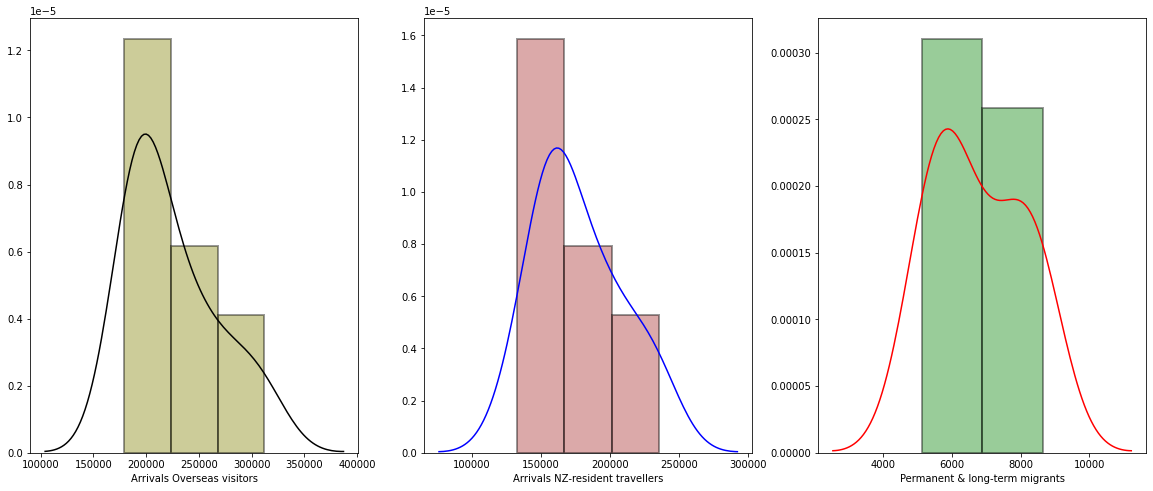

In [112]:
from scipy.stats import norm
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(year_beging_apr['Arrivals Overseas visitors'],ax=ax[0],
             hist_kws = {"edgecolor" : 'k', 'linewidth' : 2}, kde_kws = {'color' : 'k'}, color='olive',)
sns.distplot(year_beging_apr['Arrivals NZ-resident travellers'],ax=ax[1],
             hist_kws = {"edgecolor" : 'k', 'linewidth' : 2}, kde_kws = {'color' : 'b'}, color='brown',)
sns.distplot(year_beging_apr['Permanent & long-term migrants'],ax=ax[2],
             hist_kws = {"edgecolor" : 'k', 'linewidth' : 2}, kde_kws = {'color' : 'red'}, color='g',);

plt.show()

In [122]:
# df = reviews.assign(n=0).groupby(['points', 'price'])['n'].count().reset_index()
# df = df[df["price"] < 100]
v = year_beging_apr.pivot(index='Permanent & long-term migrants', columns='Departures Permanent & long-term migrants').fillna(0).values.tolist()

#3d plot Arrivals and Deparatures of permanent and long-term migrants

In [123]:
iplot([go.Surface(z=v)])